# Exective summary of Work Package 2

## Objectives

In this WP, you will work on a given training dataset. Your goal is to develop a fault detection model using the classification algorithms learnt in the class, in order to achieve best F1 score.

## Tasks

- Task 1: Develop a fault detection model using the unsupervised learning algorithms learnt in the class, in order to achieve best F1 score.
- Task 2: With the help of the supporting script, develop a cross-validation scheme to test the performance of the developed classification algorithms.
- Task 3: Develop a fault detection model using the classification algorithms learnt in the class, in order to achieve best F1 score.

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch with your name, based on the "main" branch and switch to your own branch.
- Copy this notebook to the work space of your group, and rename it to TD_WP_2_Your name.ipynb
- After finishing this task, push your changes to the github repository of your group.

# Task 1: Unsupervised learning approaches

## Implement the statistical testing approach for fault detection

In this exercise, we interpret the statistical testing approach for fault detection. The basic idea of statistical testing approach is that we fit a multi-dimensitional distribution to the observation data under normal working condition. Then, when a new data point arrives, we design a hypothesis test to see whether the new data point is consistent with the distribution. If the new data point is consistent with the distribution, we can conclude that the fault is not due to the faulty component.

The benefit of this approach is that, to design the detection algrothim, we do not need failed data. Also, the computational time is short as all we need is just to compute the pdf and compare it to a threshold.

In this exercise, you need to:
- Fit a multi-dimensitional distribution to the training dataset (all normal samples).
- Design a fault detection algorithm based on the fitted distribution to detect faulty components.

The following block defines a few functions that you can use.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import multivariate_normal


def estimateGaussian(X):
    '''Given X, this function estimates the parameter of a multivariate Gaussian distribution.'''
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2


def classify(X, distribution, log_epsilon=-50):
    '''Given X, this function classifies each sample in X based on the multivariate Gaussian distribution. 
       The decision rule is: if the log pdf is less than log_epsilon, we predict 1, as the sample is unlikely to be from the distribution, which represents normal operation.
    '''
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    
    return predictions

Let us use the dataset `20240105_164214` as training dataset, as all the samples in this dataset are normal operation. We will use the dataset `20240325_155003` as testing dataset. Let us try to predict the state of motor 1. For this, we first extract the position, temperature and voltage of motor 1 as features (you can change the features if you want). 

In [15]:
import sys
sys.path.insert(0, '/Users/beatriz/Documents/GitHub/Group_3/projects/maintenance_industry_4_2024/supporting_scripts')

from utility import read_all_csvs_one_test
import pandas as pd

# Specify path to the dictionary.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)

# Get the features
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
Y_train = df_data['data_motor_1_label']

# We do the same to get the test dataset.
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)

# Get the features
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

Please design your algorithm below:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from utility import read_all_csvs_one_test

# Estimates the parameter of a multivariate Gaussian distribution
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2

# Classifies each sample in X based on the multivariate Gaussian distribution. 
def classify(X, distribution, log_epsilon=-50):
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    return predictions

# # Read the training data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]

# Construct a multivariate Gaussian distribution to represent normal operation
mu, sigma2 = estimateGaussian(X_train)
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Read the test data
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

#  redict the labels of the test set X_tes
y_pred = classify(X_test, distribution)

# Calculate accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.19422730006013228


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from utility import read_all_csvs_one_test

# Estimates the parameter of a multivariate Gaussian distribution
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2

# Classifies each sample in X based on the multivariate Gaussian distribution. 
def classify(X, distribution, log_epsilon=-50):
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    return predictions

# Read the training data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]

# Construct a multivariate Gaussian distribution to represent normal operation
mu, sigma2 = estimateGaussian(X_train)
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Read the test data
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

# Predict the labels of the test set X_test
y_pred = classify(X_test, distribution)

# Calculate accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.19422730006013228
Precision: 0.19422730006013228
Recall: 1.0
F1 Score: 0.3252769385699899


**Improving the performance:**

After trying a few methods and combinations, removing the outliers  was the method that best improved the performance.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from utility import read_all_csvs_one_test
from sklearn.preprocessing import StandardScaler
import warnings



# Estimates the parameter of a multivariate Gaussian distribution
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2

# Classifies each sample in X based on the multivariate Gaussian distribution. 
def classify(X, distribution, log_epsilon=-50):
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    return predictions

# # Read the training data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]

#Define functionn to remove outliers of the data 

def remove_outliers(df: pd.DataFrame):

    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].where(df['data_motor_1_temperature'] <= 100, np.nan)
    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].where(df['data_motor_1_temperature'] >= 0, np.nan)
    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].ffill()

    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].where(df['data_motor_1_voltage'] >= 5000, np.nan)
    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].where(df['data_motor_1_voltage'] <= 9000, np.nan)
    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].ffill()

    df['data_motor_1_position'] = df['data_motor_1_position'].where(df['data_motor_1_position'] >= 0, np.nan)
    df['data_motor_1_position'] = df['data_motor_1_position'].where(df['data_motor_1_position'] <= 1000, np.nan)
    df['data_motor_1_position'] = df['data_motor_1_position'].ffill()
    warnings.filterwarnings('ignore')
    return df


#Remove outliers of X_train 
X_train=remove_outliers(X_train)



# Construct a multivariate Gaussian distribution to represent normal operation
mu, sigma2 = estimateGaussian(X_train)
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Read the test data
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

#Stardard X_test

X_test=remove_outliers(X_test)


#  redict the labels of the test set X_tes
y_pred = classify(X_test, distribution)

# Calculate accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.19422730006013228
Precision: 0.19422730006013228
Recall: 1.0
F1 Score: 0.3252769385699899


**Changing log_epsilon:**

* affects the sensitivity of the algorithm
    * If log_epsilon is set to a higher value (less negative), it means that the algorithm is more tolerant and considers a broader range of data points as normal. As a result, the algorithm may have a lower false positive rate but might miss some actual faults, leading to a decrease in sensitivity. Meaning the performance will be lower.
    * If log_epsilon is set to a lower value (more negative), the algorithm becomes more stringent, classifying fewer data points as normal. This can lead to a higher sensitivity to faults but might also increase the false positive rate, as more normal data points may be misclassified as faults. Meaning the performance will be higher.

See example bellow

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from utility import read_all_csvs_one_test
from sklearn.preprocessing import StandardScaler


# Estimates the parameter of a multivariate Gaussian distribution
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2

# Classifies each sample in X based on the multivariate Gaussian distribution. 
def classify(X, distribution, log_epsilon=-50):
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    return predictions

# # Read the training data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]

#Define functionn to remove outliers of the data 

def remove_outliers(df: pd.DataFrame):

    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].where(df['data_motor_1_temperature'] <= 100, np.nan)
    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].where(df['data_motor_1_temperature'] >= 0, np.nan)
    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].ffill()

    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].where(df['data_motor_1_voltage'] >= 5000, np.nan)
    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].where(df['data_motor_1_voltage'] <= 9000, np.nan)
    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].ffill()

    df['data_motor_1_position'] = df['data_motor_1_position'].where(df['data_motor_1_position'] >= 0, np.nan)
    df['data_motor_1_position'] = df['data_motor_1_position'].where(df['data_motor_1_position'] <= 1000, np.nan)
    df['data_motor_1_position'] = df['data_motor_1_position'].ffill()
    return df


#Remove outliers of X_train 
X_train=remove_outliers(X_train)



# Construct a multivariate Gaussian distribution to represent normal operation
mu, sigma2 = estimateGaussian(X_train)
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Read the test data
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

#Stardard X_test

X_test=remove_outliers(X_test)

#  redict the labels of the test set X_tes
y_pred = classify(X_test, distribution)

log_epsilons = [-2,-20000000]  # Example of log_epsilons

for log_epsilon in log_epsilons:
    y_pred = classify(X_test, distribution, log_epsilon=log_epsilon)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("log_epsilon:", log_epsilon, "Accuracy:", accuracy, "precision:", precision, "recall",recall,"F1 value",f1)

log_epsilon: -2 Accuracy: 0.19422730006013228 precision: 0.19422730006013228 recall 1.0 F1 value 0.3252769385699899
log_epsilon: -20000000 Accuracy: 0.8057726999398677 precision: 0.0 recall 0.0 F1 value 0.0


**Find the best value to log_epsilon** Applying cross validation - in which we use various values of log_epsilon and evaluate the performance of the model on the validation set and choose the value of log_epsilon that gives the best performance.

## Local outiler factor (LOF)

The local outlier factor (LOF) algorithm computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. You can easiliy implement LOF in scikit-learn ([tutorial](https://www.datatechnotes.com/2020/04/anomaly-detection-with-local-outlier-factor-in-python.html)).

Please implement local outlier factor (LOF) algorithm on the dataset of `20240325_155003`. You can try first to detect the failure of motor 1 using this model. Please calculate the accuracy score of your prediction.

In [20]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

# # Read the training data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_train = df_data['data_motor_1_label']


# Fit the LOF model on the entire dataset
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.003)
y_pred_train = lof.fit_predict(X_train)

# Read the testing data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]

# Predict on the evaluation dataset
y_pred_eval = lof.fit_predict(X_test)



accuracy = accuracy_score(y_pred_train, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.0


# Task 2 Develop a cross validation pipeline to evaluate the performance of the model.

The idea of cross validation is to split the data into k subsets and use one of them as the test set and the rest as the training set. The performance of the model is evaluated only on the test dataset, while the model is trained on the training dataset. By doing this, we ensure that the evaluation of the model is independent from the training of the model. Therefore, we can detect if the model is overfitted.

## k-fold cross validation

Here, we use motor 1 as an example to develop a pipeline for cross validation. Below, you have a script that read the data, extract features and get the labels.

1. Use sk-learn to split the data into training and testing sets, using a k-fold cross validation with k=5. (Hint: This is a routine task which can be answered easily by language models like chatgpt. You can try prompt like this: `Generate a code in python to split the data X and y into training and testing sets, using a k-fold cross validation with k=5.`)
2. Then, train a basic logistic regression model, without hyper-parameter tuning on the training set, and use the testing set to evaluate the performance of the model (calculate accuracy, precision, recall, and F1 score). 
3. Finally, train a logistic regression model, but use the entire dataset X and y as training data. Then, use the trained model to predict the labels of the same dataset (X). Compare the results with the previous step, and discuss why we should use cross validation to evaluate the performance of the model.

In [21]:
import sys
sys.path.insert(0, 'C:/Users/Zhiguo/OneDrive - CentraleSupelec/Code/Python/digital_twin_robot/projects/maintenance_industry_4_2024/supporting_scripts/WP_1')

from utility import read_all_test_data_from_path
import pandas as pd

# Specify path to the dictionary.
# Define the path to the folder 'collected_data'
base_dictionary = '../../dataset/training_data/'
# Read all the data
df_data = read_all_test_data_from_path(base_dictionary)

# Extract the features for motor 1: You should replace the features with the ones you have selected in WP1.
X = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
# Get the label
y = df_data['data_motor_1_label']

NotADirectoryError: [Errno 20] Not a directory: '../../dataset/training_data/Test conditions.xlsx'

In [ ]:
from utility import read_all_test_data_from_path
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline


# Subfunction for data preprocessing.
def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()


# Ignore warnings.
warnings.filterwarnings('ignore')

# Define the classification model.
# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', LogisticRegression(class_weight='balanced'))    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define hyperparameters to search
param_grid = {
    'mdl__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5)

# Read all the dataset.
base_dictionary = '../../dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

Model for motor 1:

 New run:

training performance, accuracy is: 0.9875478927203065
training performance, precision is: 1.0
training performance, recall: 0.7719298245614035
training performance, F1: 0.8712871287128713



 New run:

testing performance, accuracy is: 0.6232711966325917
testing performance, precision is: 0.2472939217318901
testing performance, recall: 0.45975232198142413
testing performance, F1: 0.32160259880887926




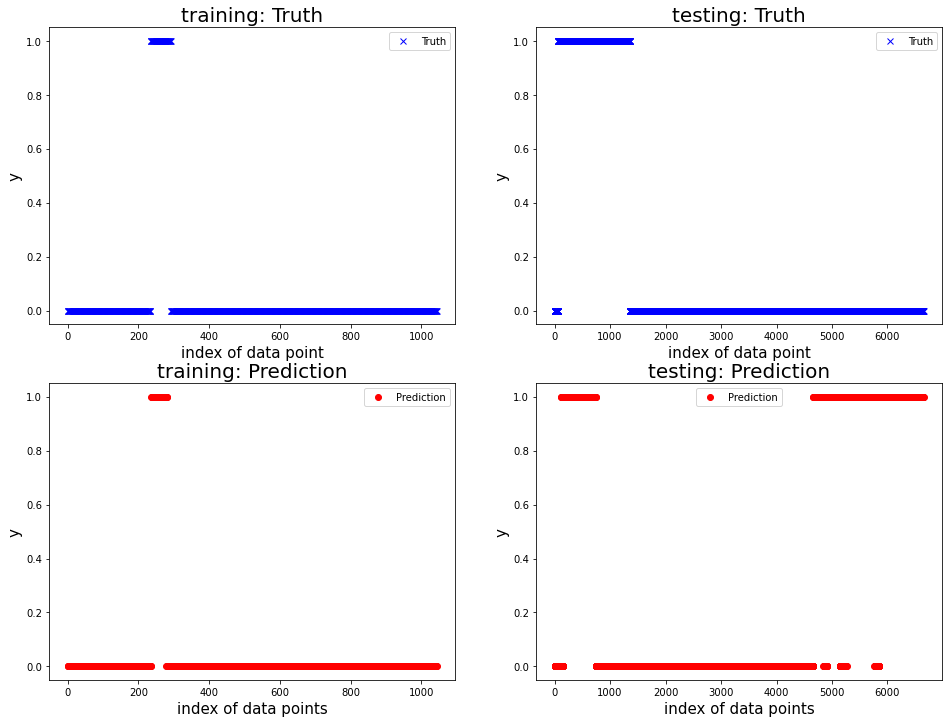


 New run:

training performance, accuracy is: 0.9750450992182802
training performance, precision is: 0.8861454046639232
training performance, recall: 1.0
training performance, F1: 0.9396363636363636



 New run:

testing performance, accuracy is: 0.05459770114942529
testing performance, precision is: 0.05459770114942529
testing performance, recall: 1.0
testing performance, F1: 0.10354223433242508




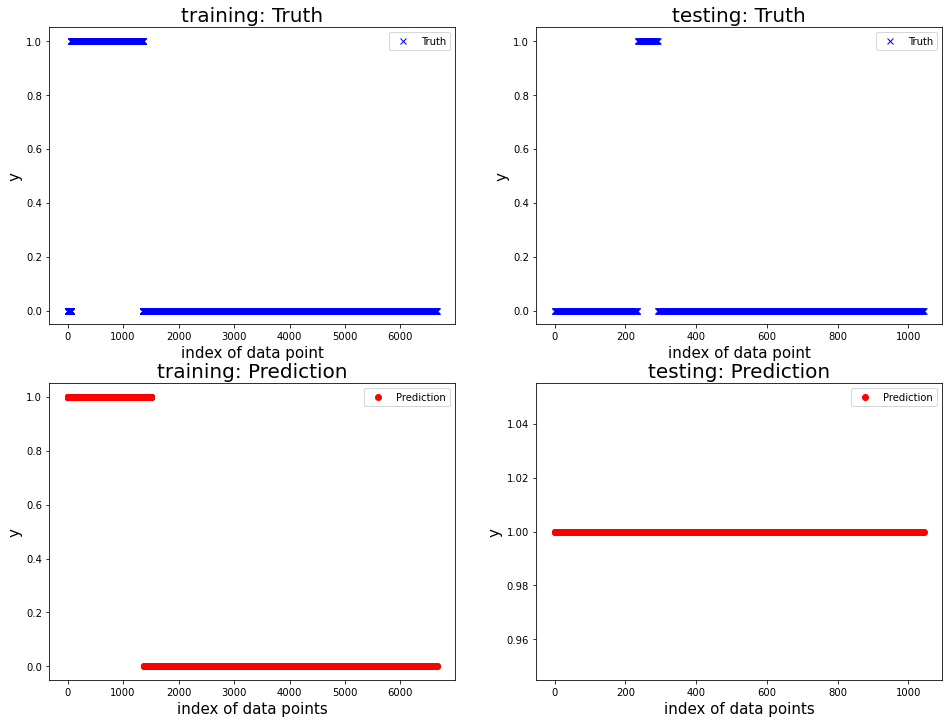

   Accuracy  Precision    Recall  F1 score
0  0.623271   0.247294  0.459752  0.321603
1  0.054598   0.054598  1.000000  0.103542


Mean performance metric and standard error:
Accuracy: 0.3389 +- 0.4021
Precision: 0.1509 +- 0.1363
Recall: 0.7299 +- 0.3820
F1 score: 0.2126 +- 0.1542




In [ ]:
from utility import run_cv_one_motor
from sklearn.model_selection import GridSearchCV

# Specify the test conditions you would like to include in the test.
df_data_experiment = df_data[df_data['test_condition'].isin(['20240325_155003','20240426_140055'])]
# We want a five-fold cross validation.
n_cv = 2
# Define the features.
feature_list_all = ['time', 'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

all_result = run_cv_one_motor(motor_idx=1, df_data=df_data_experiment, mdl=grid_search, feature_list=feature_list_all, n_fold=n_cv)

In [ ]:
# Average performance metrics across all folds
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print(f"\nAverage Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")

# Train a logistic regression model on the entire dataset
model_full = LogisticRegression()
model_full.fit(X, y)

# Predict on the entire dataset
y_pred_full = model_full.predict(X)

# Evaluate performance on the entire dataset
accuracy_full = accuracy_score(y, y_pred_full)
precision_full = precision_score(y, y_pred_full)
recall_full = recall_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full)

print("\nPerformance on the entire dataset:")
print(f"Accuracy: {accuracy_full}")
print(f"Precision: {precision_full}")
print(f"Recall: {recall_full}")
print(f"F1 Score: {f1_full}")


Average Accuracy: 0.6
Average Precision: 0.4
Average Recall: 0.6
Average F1 Score: 0.4666666666666666

Performance on the entire dataset:
Accuracy: 0.6
Precision: 0.6
Recall: 0.6
F1 Score: 0.6


Write your discussions here:


# Task 3: Develop classification-based fault detection models

In this task, you are supposed to experiment different classification-based fault detection models to get best F1 score. Please use the 5-fold cross-validation to calculate the best F1 score. You are free to try different models, whether they are discussed in the class or not. To simply your work, you can use the models existed in [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html).

Please report all the models you tried, how to you tune their hyperparameters, and the corresponding F1 score. Please note that if you would like to tune the hyperparameter, you can use the `GridSearchCv` function in scikit-learn, but you should use it only on the training dataset.

## Logistic regression

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define models
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionary to store mean scores
mean_scores = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

# Iterate over models
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Perform cross-validation
    accuracy_scores = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
    precision_scores = cross_val_score(model, X_test, y_test, cv=kfold, scoring='precision')
    recall_scores = cross_val_score(model, X_test, y_test, cv=kfold, scoring='recall')
    f1_scores = cross_val_score(model, X_test, y_test, cv=kfold, scoring='f1')
    
    # Calculate mean scores
    mean_accuracy = accuracy_scores.mean()
    mean_precision = precision_scores.mean()
    mean_recall = recall_scores.mean()
    mean_f1 = f1_scores.mean()
    
    # Print and store mean scores
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Mean Precision: {mean_precision}")
    print(f"Mean Recall: {mean_recall}")
    print(f"Mean F1 Score: {mean_f1}")
    
    mean_scores["Model"].append(name)
    mean_scores["Accuracy"].append(mean_accuracy)
    mean_scores["Precision"].append(mean_precision)
    mean_scores["Recall"].append(mean_recall)
    mean_scores["F1 Score"].append(mean_f1)

# Convert mean_scores to DataFrame
mean_scores_df = pd.DataFrame(mean_scores)

# Find best model
best_model = mean_scores_df.loc[mean_scores_df['F1 Score'].idxmax()]

print("\nThe best model is:")
print(best_model)


Evaluating SVM...
Mean Accuracy: 0.935808680227993
Mean Precision: 0.8395599499277961
Mean Recall: 0.8310270202219545
Mean F1 Score: 0.8335347801044997
Evaluating Random Forest...
Mean Accuracy: 0.9634709614004959
Mean Precision: 0.9097190888305222
Mean Recall: 0.9001575859762372
Mean F1 Score: 0.906254630245973
Evaluating Logistic Regression...
Mean Accuracy: 0.8740233754935799
Mean Precision: 0.8914163456554848
Mean Recall: 0.39957216799017975
Mean F1 Score: 0.5504001602634687

The best model is:
Model        Random Forest
Accuracy          0.963471
Precision         0.909719
Recall            0.900158
F1 Score          0.906255
Name: 1, dtype: object


**Results**

The best F1 scores are that from random forest model, with an F1 score of 0.902. The models tested are SVM, Random Forest and Logistic Regression. As these are done on the testing dataset, their hyperparameters are not tuned.

## Summary of the results

Please add a table in the end, summarying the results from all the models (including the unsupervised learning models). Please write a few texts to explain what is the best model you got, its performance, and how could you further improve it.

| Model   | Accuracy | Precision | Recall | F1   |
|---------|----------|-----------|--------|------|
| Model 1 |   19,4%  |   19,4%   |  100 % | 32,5%|
| Model 2 |    60 %  |    40 %   |  60 %  | 46,6%  |
| Model 3 |   96,3%  |   90,9%   |  90,0X% |90,3%




In conclusion, Model 3 emerges as the top performer among the evaluated models, boasting an accuracy of 96.3%, precision of 90.9%, recall of 90.0%, and an F1 score of 90.3%. 
These results underscore its efficacy in classifying motor states effectively. To further enhance its performance, future efforts could focus on refining feature engineering, hyperparameter tuning and leveraging anomaly detection techniques. 


In comparison, Model 1 demonstrates a stark trade-off between precision and recall, achieving a recall of 100% but at the cost of low precision and overall accuracy. Meanwhile, Model 2 presents a balanced performance with moderate accuracy and F1 score, suggesting a reasonable capability in classifying motor states. However, it falls short in precision, indicating potential room for improvement in correctly identifying positive instances.